# STEP 1: IMPORTING LIBRARIES AND LOADING THE DATASET

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud

# Load the dataset
file_path = 'Updated_Resume_with_Class.csv'
resume_df = pd.read_csv(file_path)

# Initial cleaning
resume_df['Resume_str'] = resume_df['Resume_str'].fillna("")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check if the dataset is loaded correctly
print(resume_df.info())  # Overview of dataset
print(resume_df.head())  # Preview the first few rows

# Confirm no missing values in 'Resume_str'
print("NaN values in 'Resume_str':", resume_df['Resume_str'].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Columns: 170 entries, ID to Unnamed: 169
dtypes: object(170)
memory usage: 4.5+ MB
None
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category      Class  \
0  <div class="fontsize fontface vmargins hmargin...       HR  Unflagged   
1  <div class="fontsize fontface vmargins hmargin...       HR  Unflagged   
2  <div class="fontsize fontface vmargins hmargin...       HR  Unflagged   
3  <div class="fontsize fontface vmargins hmargin...       HR  Unflagged   
4  <div class="fontsize fontface vmargins hmargin...       HR

# STEP 2: DATA CLEANING

In [ ]:
# Drop columns with more than 95% NaN values
threshold = 0.95
resume_df = resume_df.loc[:, resume_df.isnull().mean() < threshold]

# Drop columns with a single unique value
resume_df = resume_df.loc[:, resume_df.nunique() > 1]

# Ensure the 'Class' column is correctly encoded (Flagged = 1, Unflagged = 0)
resume_df['Class'] = resume_df['Class'].map({'Unflagged': 0, 'Flagged': 1})

# Filter rows with exactly 5 non-NaN (valid) values, including 'Class'
valid_row_mask = resume_df.notna().sum(axis=1) == 5

# Apply the mask to filter rows
resume_df = resume_df[valid_row_mask]

# Fill missing values in the 'Category' column (if needed)
resume_df['Category'].fillna('Unknown', inplace=True)

# Drop any remaining rows where 'Class' is NaN
resume_df = resume_df.dropna(subset=['Class'])

# Convert 'Class' column to integers (in case NaNs were removed)
resume_df['Class'] = resume_df['Class'].astype(int)

# Verify the cleaned dataset
print(f"Shape after cleaning: {resume_df.shape}")
print("Remaining NaN values:", resume_df.isnull().sum().sum())
print("Unique values in 'Class':", resume_df['Class'].unique())
print(resume_df.head())


Shape after cleaning: (2458, 5)
Remaining NaN values: 0
Unique values in 'Class': [0 1]
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  Class  
0  <div class="fontsize fontface vmargins hmargin...       HR      0  
1  <div class="fontsize fontface vmargins hmargin...       HR      0  
2  <div class="fontsize fontface vmargins hmargin...       HR      0  
3  <div class="fontsize fontface vmargins hmargin...       HR      0  
4  <div class="fontsize fontface vmargins hmargin...       HR      1  


<ipython-input-29-0e30669561d9>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  resume_df['Category'].fillna('Unknown', inplace=True)


# STEP 3: DATA VISUALIZATION

In [ ]:
print("Unique values in 'Class':", resume_df['Class'].unique())
print("Unique values in 'Category':", resume_df['Category'].unique())
print("Number of rows:", resume_df.shape[0])


Unique values in 'Class': [0 1]
Unique values in 'Category': ['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']
Number of rows: 2458


<ipython-input-32-f1891f170d17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=resume_df, palette='viridis')


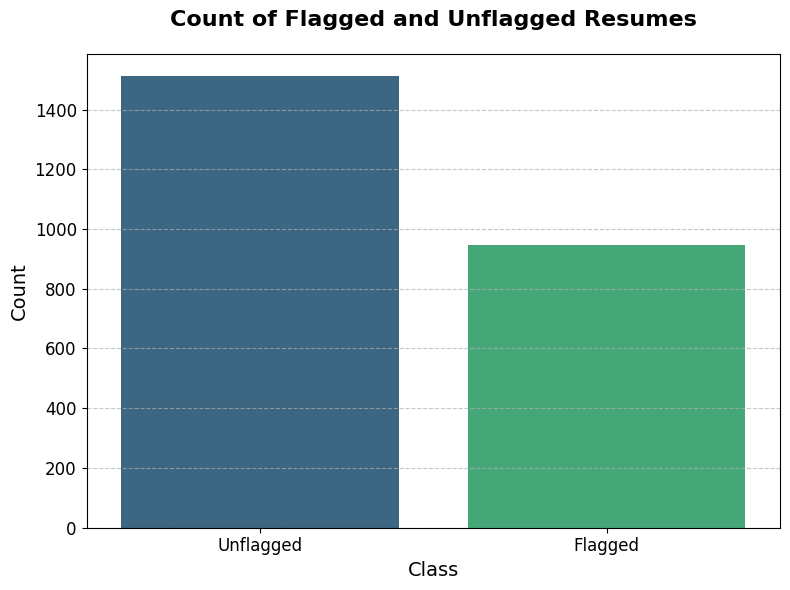

In [ ]:
# Plotting the distribution of Flagged and Unflagged classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=resume_df, palette='viridis')
plt.title('Count of Flagged and Unflagged Resumes', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Unflagged', 'Flagged'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-33-8998e0dc7721>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


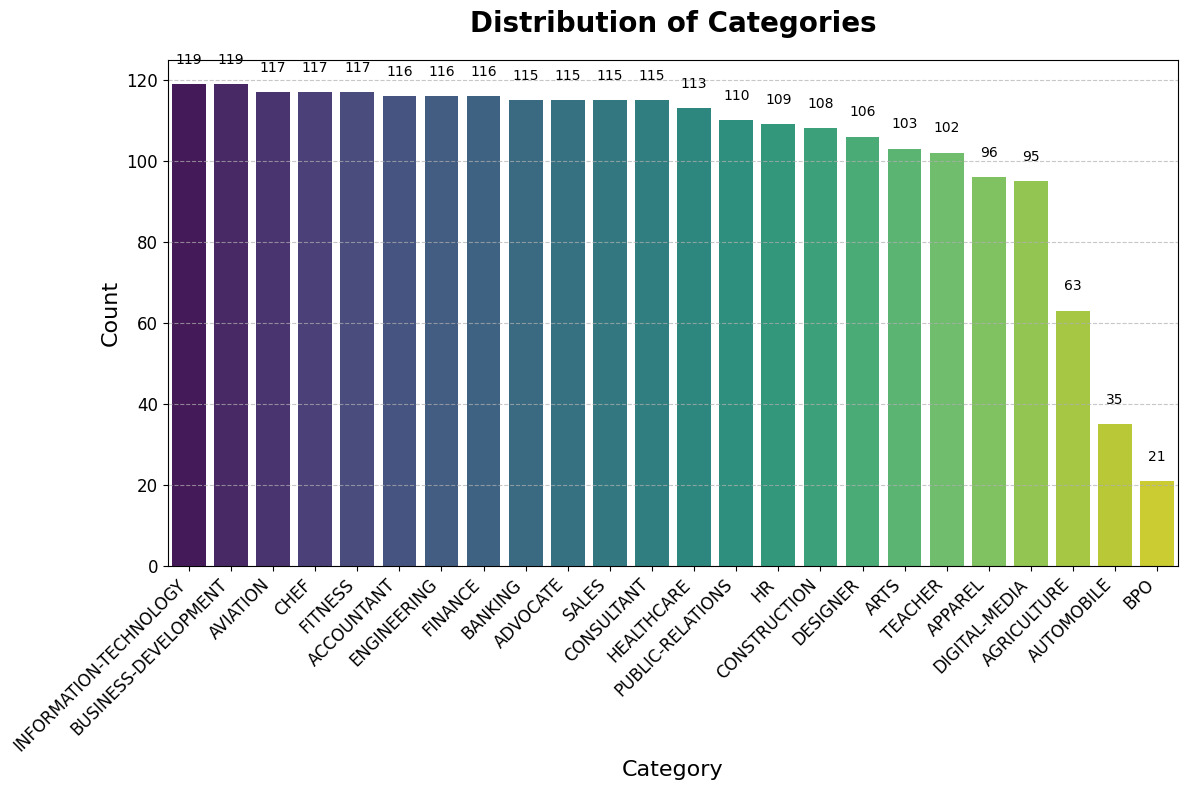

In [ ]:
# Plotting the distribution of Categories as a Bar Chart
plt.figure(figsize=(12, 8))
category_counts = resume_df['Category'].value_counts()

sns.barplot(
    x=category_counts.index,
    y=category_counts.values,
    palette='viridis'
)

# Add labels and title
plt.title('Distribution of Categories', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations to the bars
for index, value in enumerate(category_counts.values):
    plt.text(index, value + 5, f'{value}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


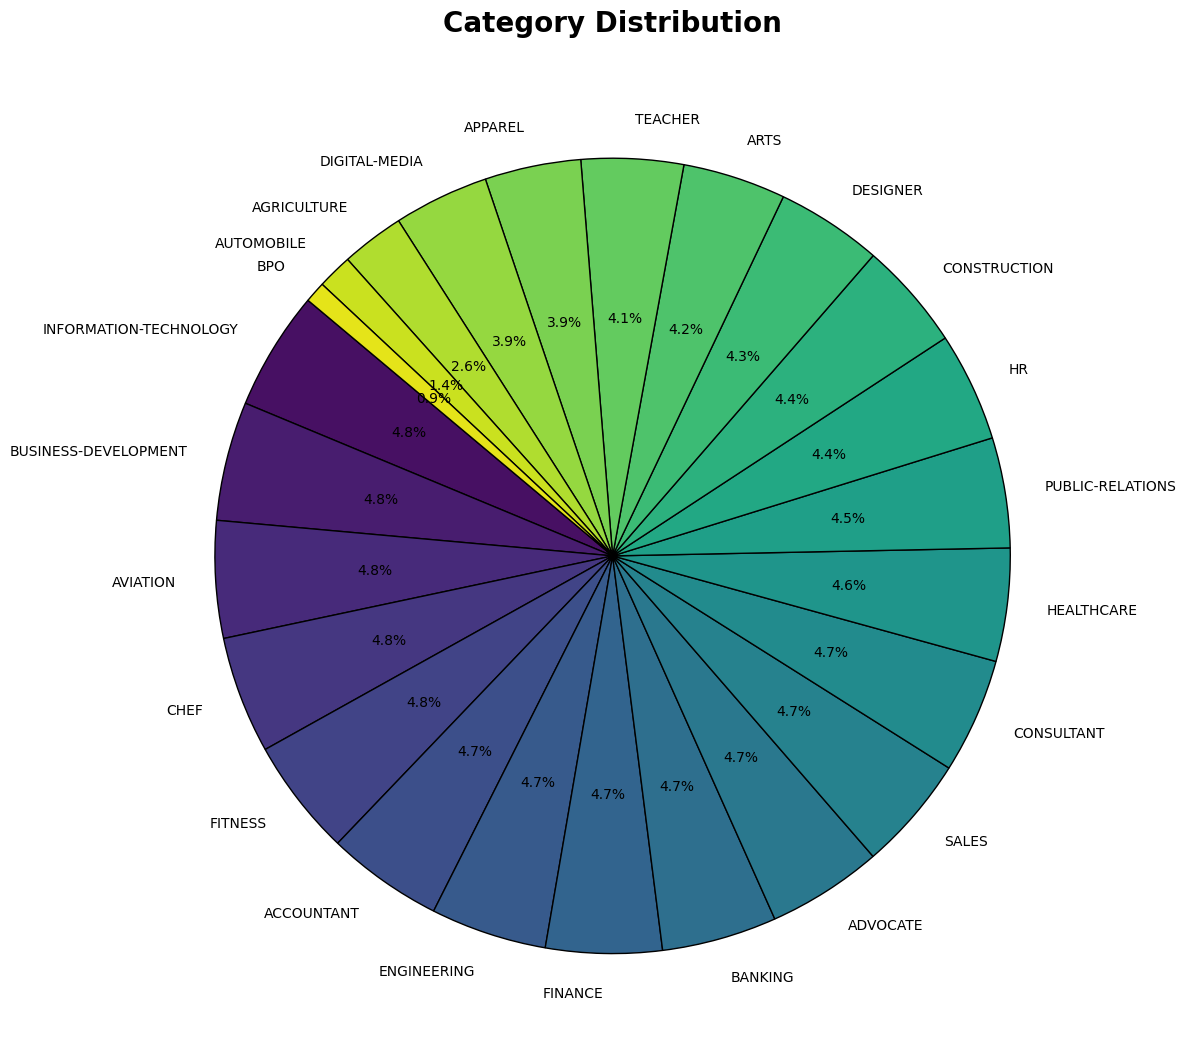

In [ ]:
# Plotting the distribution of Categories as a Pie Chart
plt.figure(figsize=(12, 12))
category_counts = resume_df['Category'].value_counts()

# Create pie chart
plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', n_colors=len(category_counts)),
    wedgeprops={'edgecolor': 'black'}
)

# Add title
plt.title('Category Distribution', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


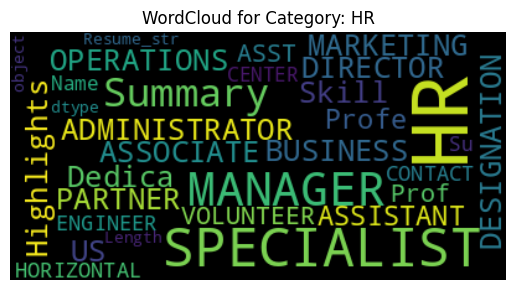

In [ ]:
# WordCloud for a specific category
category_name = 'HR'  # Example category
wc = WordCloud(max_words=2000, stopwords=WordCloud().stopwords).generate(
    str(resume_df[resume_df['Category'] == category_name]['Resume_str'])
)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"WordCloud for Category: {category_name}")
plt.show()

# STEP 4: FEATURE VECTORIZATION

In [ ]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(resume_df['Resume_str'])
y = resume_df['Class']


In [ ]:
# Display the feature names generated by the TF-IDF Vectorizer
feature_names = vectorizer.get_feature_names_out()
print("Sample features from TF-IDF Vectorizer:", feature_names[:20])  # Display the first 20 features


Sample features from TF-IDF Vectorizer: ['00' '000' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '100' '1000'
 '101' '1099' '10g' '11' '110' '11g']


# STEP 5: TRAIN-TEST SPLIT

In [ ]:
# Check for missing values in y
print("Number of NaN values in y:", y.isnull().sum())

# Drop rows with missing target values
resume_df = resume_df[~resume_df['Class'].isnull()]

# Recreate X and y
X = vectorizer.fit_transform(resume_df['Resume_str'])
y = resume_df['Class']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train-Test split completed successfully.")


Number of NaN values in y: 0
Train-Test split completed successfully.
